In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Import the dataset
df = pd.read_csv('survey responses.csv')
print('This dataset include {} rows and {} columns'.format(*df.shape))

This dataset include 343 rows and 23 columns


In [3]:
df

,Current program,Year of study,Program level,Sex,Ethnicity,Age group,Preferred learning style,Used ChatGPT for learning purposes,How often ChatGPT is used for educational\npurposes,ChatGPT usage purposes,...,Improvement of marks\nsince using ChatGPT for personalized learning,Level of confidence in understanding of\nsubjects after using ChatGPT,Sample situations where\nChatGPT significantly aided learning,Used any features of ChatGPT that tailor\nresponses to learning preferences or\nstyles,"If yes, how effective are the tailored\nresponses in enhancing comprehension and\nknowledge acquisition",Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance,Improvements to suggest for ChatGPT\nto better support learning,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students,Features that would like to be seen in ChatGPT to\nenhance personalized learning capabilities,Additional comments or suggestions regarding\nthe use of ChatGPT in learning process
0,CSIS,Second,Postgraduate,Male,Hispanic/Latino,25-34,Auditory,Yes,Weekly,"Understanding concepts, Exam Preparation",...,No change,Neutral,NaN,No,NaN,Neutral,NaN,Disagree,NaN,NaN
1,CSIS,First,Diploma,Female,Asian,25-34,Auditory,Yes,Daily,"Understanding concepts, Assignments, Tutoring ...",...,"Yes, significant improvement",Very confident,Ask for explaining some concept,Yes,Very effective,Agree,"The way ChatGPT rectify answers that I asked, ...",Strongly Agree,Visualization,NaN
2,CSIS,Second,Postgraduate,Female,Asian,25-34,Auditory,No,Never,Understanding concepts,...,No change,Neutral,Explain difficult concepts,No,Neutral,Neutral,NaN,Neutral,More examples,Not use for exams
3,Business,Third,Bachelors,Male,Asian,25-34,Auditory,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CSIS,Second,Postgraduate,Male,Asian,25-34,Auditory,Yes,Daily,"Understanding concepts, Homework assistance, A...",...,"Yes, slight improvement",Confident,When I search for concepts that I don't unders...,Yes,Very effective,Agree,more accurate amd don't fake citations,Strongly Agree,Summarize lectures,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Business,Second,Bachelors,Female,Asian,35-44,"Visual, Reading/Writing",Yes,Rarely,Project research,...,Decrease in grades,Confident,Assisted in learning a new programming languag...,Yes,Effective,Neutral,Enhancing the feedback system for educational ...,Strongly Agree,NaN,NaN
339,Business,Third,Diploma,Prefer not to say,Asian,18-24,"Visual, Reading/Writing",Yes,Monthly,Exam Preparation,...,Decrease in grades,Not applicable,Provided additional practice problems for math,Yes,Very effective,Disagree,Enhancing the summarization capabilities for e...,Neutral,NaN,NaN
340,Business,Third,Postgraduate,Female,Hispanic/Latino,Prefer not to say,"Visual, Reading/Writing, Usage Patterns",Yes,Daily,"Understanding concepts, Assignments, Class lec...",...,"Yes, significant improvement",Very confident,NaN,No,NaN,Strongly Agree,Enhancing the feedback system for educational ...,Strongly Agree,adaptive learning algorithms,I would recommend incorporating ChatGPT into e...
341,Business,First,Diploma,Female,Pacific Islander,25-34,"Visual, Reading/Writing, Usage Patterns",Yes,Rarely,Homework assistance,...,No change,Very confident,NaN,No,NaN,Strongly disagree,Introducing personalized study plans,Neutral,peer collaboration features,I have had a positive experience using ChatGPT...


# Data Cleaning

In [4]:
print(df.isnull().sum())

Current program                                                                                              0
Year of study                                                                                                0
Program level                                                                                                0
Sex                                                                                                          0
Ethnicity                                                                                                    0
Age group                                                                                                    0
Preferred learning style                                                                                     0
Used ChatGPT for learning purposes                                                                           0
How often  ChatGPT is used for educational\npurposes                                                        28
C

In [5]:
# Get the indices of the last two rows
last_two_indices = df.index[-2:]

# Drop the last two rows
df = df.drop(last_two_indices)

In [6]:
# Custom Value Imputation
custom_values = {
    'How often  ChatGPT is used for educational\npurposes': 'Not Applicable',
    'ChatGPT usage purposes': 'Not Applicable',
    'ChatGPT usage hours per week': 'Not Applicable',
    'Satisfaction with the quality of responses by ChatGPT': 'Not Applicable',
    'How helpful ChatGPT in improving the\nunderstanding of course material': 'Not Applicable',
    'Improvement of marks\nsince using ChatGPT for personalized learning': 'Not Applicable',
    'Level of confidence in understanding of\nsubjects after using ChatGPT': 'Not Applicable',
    'Sample situations where\nChatGPT significantly aided learning': 'No comment',
    'Used any features of ChatGPT that tailor\nresponses to  learning preferences or\nstyles': 'Not Applicable',
    'If yes, how effective are the tailored\nresponses in enhancing comprehension and\nknowledge acquisition': 'Not Applicable',
    'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance': 'Not Applicable',
    'Improvements to suggest for ChatGPT\nto better support learning': 'No comment',
    'Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students': 'Not Applicable',
    'Features that would like to be seen in ChatGPT to\nenhance  personalized learning capabilities': 'No comment',
    'Additional comments or suggestions regarding\nthe use of ChatGPT in learning process': 'No comment'
}

# Apply custom value imputation
df = df.fillna(value=custom_values)

In [7]:
print(df.isnull().sum())

Current program                                                                                            0
Year of study                                                                                              0
Program level                                                                                              0
Sex                                                                                                        0
Ethnicity                                                                                                  0
Age group                                                                                                  0
Preferred learning style                                                                                   0
Used ChatGPT for learning purposes                                                                         0
How often  ChatGPT is used for educational\npurposes                                                       0
ChatGPT usage purpo

In [8]:
# Convert 'Preferred learning style' to categorical values
learning_style_dummies = df['Preferred learning style'].str.get_dummies(sep=', ')

# Convert 'ChatGPT usage purposes' to categorical values
usage_purposes_dummies = df['ChatGPT usage purposes'].str.get_dummies(sep=', ')

# Concatenate the new dummy columns to the original DataFrame
df = pd.concat([df, learning_style_dummies, usage_purposes_dummies], axis=1)

# Drop the original columns if no longer needed
df.drop(['Preferred learning style', 'ChatGPT usage purposes'], axis=1, inplace=True)

print("\nDataFrame with Categorical Values:")
print(df)



DataFrame with Categorical Values:
    Current program Year of study Program level                Sex  \
0              CSIS        Second  Postgraduate               Male   
1              CSIS         First       Diploma             Female   
2              CSIS        Second  Postgraduate             Female   
3          Business         Third     Bachelors               Male   
4              CSIS        Second  Postgraduate               Male   
..              ...           ...           ...                ...   
336        Business         First       Diploma  Prefer not to say   
337        Business        Second   Certificate               Male   
338        Business        Second     Bachelors             Female   
339        Business         Third       Diploma  Prefer not to say   
340        Business         Third  Postgraduate             Female   

             Ethnicity          Age group Used ChatGPT for learning purposes  \
0      Hispanic/Latino              25-34  

In [9]:
# Define the categorical columns and possible categories
categorical_columns = {
    'Current program': ['Accounting', 'Business', 'CSIS', 'Finance', 'Hospitality_Management', 'Marketing', 'Business Law', 'OADM'],
    'Year of study': ['First', 'Second', 'Third', 'Fourth'],
    'Program level': ['Bachelors', 'Certificate', 'Diploma', 'Postgraduate'],
    'Sex': ['Female', 'Male', 'Prefer not to say'],
    'Ethnicity': ['Asian', 'Hispanic/Latino', 'Native American', 'Pacific Islander', 'Prefer not to say', 'White/Caucasian'],
    'Age group': ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', 'Prefer not to say'],
    'Used ChatGPT for learning purposes': ['Yes', 'No'],
    'How often  ChatGPT is used for educational\npurposes': ['Daily', 'Weekly', 'Monthly', 'Rarely', 'Never', 'Not Applicable'],
    'ChatGPT usage hours per week': ['Less than 1 hour', '1 to 3 hours', '3 to 5 hours', 'More than 5 hours', 'Not Applicable'],
    'Satisfaction with the quality of responses by ChatGPT' : ['Very satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very dissatisfied', 'Not Applicable'],
    'How helpful ChatGPT in improving the\nunderstanding of course material' : ['Very Helpful', 'Helpful', 'Neutral', 'Unhelpful', 'Very unhelpful', 'Not Applicable'],
    'Improvement of marks\nsince using ChatGPT for personalized learning': ['Yes, significant improvement', 'Yes, slight improvement', 'No change', 'Decrease in grades', 'Not Applicable'],
    'Level of confidence in understanding of\nsubjects after using ChatGPT': ['Very confident', 'Confident', 'Neutral', 'Not confident', 'Not applicable'],
    'Used any features of ChatGPT that tailor\nresponses to  learning preferences or\nstyles': ['Yes', 'No', 'Not Applicable'],
    'If yes, how effective are the tailored\nresponses in enhancing comprehension and\nknowledge acquisition': ['Very effective', 'Effective', 'Neutral', 'Ineffective', 'Very ineffective', 'Not Applicable'],
    'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance': ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'Not Applicable'],
    'Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students': ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'Not Applicable']
}

categorical_columns


{'Current program': ['Accounting',
  'Business',
  'CSIS',
  'Finance',
  'Hospitality_Management',
  'Marketing',
  'Business Law',
  'OADM'],
 'Year of study': ['First', 'Second', 'Third', 'Fourth'],
 'Program level': ['Bachelors', 'Certificate', 'Diploma', 'Postgraduate'],
 'Sex': ['Female', 'Male', 'Prefer not to say'],
 'Ethnicity': ['Asian',
  'Hispanic/Latino',
  'Native American',
  'Pacific Islander',
  'Prefer not to say',
  'White/Caucasian'],
 'Age group': ['Under 18',
  '18-24',
  '25-34',
  '35-44',
  '45-54',
  '55-64',
  'Prefer not to say'],
 'Used ChatGPT for learning purposes': ['Yes', 'No'],
 'How often  ChatGPT is used for educational\npurposes': ['Daily',
  'Weekly',
  'Monthly',
  'Rarely',
  'Never',
  'Not Applicable'],
 'ChatGPT usage hours per week': ['Less than 1 hour',
  '1 to 3 hours',
  '3 to 5 hours',
  'More than 5 hours',
  'Not Applicable'],
 'Satisfaction with the quality of responses by ChatGPT': ['Very satisfied',
  'Satisfied',
  'Neutral',
  'Dis

In [10]:
# Function to normalize column names
def normalize_string(s):
    return s.replace(' ', '_').replace('\n', '_').replace('-', '_')

# Normalize the categorical columns' values
for column in categorical_columns.keys():
    if column in df.columns:
        df[column] = df[column].apply(normalize_string)

# Create dummy variables for each categorical feature
for column, categories in categorical_columns.items():
    if column in df.columns:
        # Create dummy variables for the current column
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=False, dtype=int)
        
        # Ensure all possible categories are present by adding missing columns with zeros
        for category in categories:
            dummy_column = f"{column}_{normalize_string(category)}"
            if dummy_column not in dummies.columns:
                dummies[dummy_column] = 0
        
        # Reorder columns to ensure all categories are present
        dummies = dummies[[f"{column}_{normalize_string(category)}" for category in categories]]
        
        # Concatenate the dummy variables to the original DataFrame
        df = pd.concat([df, dummies], axis=1)
        
        # Drop the original categorical column
        df = df.drop(column, axis=1)

# Print the DataFrame to check results
print(df)

    Sample situations where\nChatGPT significantly aided learning  \
0                                           No comment              
1                      Ask for explaining some concept              
2                           Explain difficult concepts              
3                                           No comment              
4    When I search for concepts that I don't unders...              
..                                                 ...              
336                                         No comment              
337     Provided additional practice problems for math              
338  Assisted in learning a new programming languag...              
339     Provided additional practice problems for math              
340                                         No comment              

    Improvements to suggest for ChatGPT\nto better support learning  \
0                                           No comment                
1    The way ChatGPT rectify 

In [11]:
df

,Sample situations where\nChatGPT significantly aided learning,Improvements to suggest for ChatGPT\nto better support learning,Features that would like to be seen in ChatGPT to\nenhance personalized learning capabilities,Additional comments or suggestions regarding\nthe use of ChatGPT in learning process,Auditory,Kinesthetic,Reading/Writing,Usage Patterns,Visual,Assignments,...,Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Neutral,Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Disagree,Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Strongly_disagree,Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Not_Applicable,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Strongly_Agree,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Agree,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Neutral,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Disagree,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Strongly_disagree,Think that integrating ChatGPT more deeply into\nthe curriculum would benefit students_Not_Applicable
0,No comment,No comment,No comment,No comment,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Ask for explaining some concept,"The way ChatGPT rectify answers that I asked, ...",Visualization,No comment,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Explain difficult concepts,No comment,More examples,Not use for exams,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,No comment,No comment,No comment,No comment,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,When I search for concepts that I don't unders...,more accurate amd don't fake citations,Summarize lectures,No comment,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,No comment,Enhancing the summarization capabilities for e...,No comment,No comment,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
337,Provided additional practice problems for math,Introducing personalized study plans,No comment,No comment,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
338,Assisted in learning a new programming languag...,Enhancing the feedback system for educational ...,No comment,No comment,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
339,Provided additional practice problems for math,Enhancing the summarization capabilities for e...,No comment,No comment,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [12]:
df.columns

Index(['Sample situations where\nChatGPT significantly aided learning',
       'Improvements to suggest for ChatGPT\nto better support learning',
       'Features that would like to be seen in ChatGPT to\nenhance  personalized learning capabilities',
       'Additional comments or suggestions regarding\nthe use of ChatGPT in learning process',
       'Auditory', 'Kinesthetic', 'Reading/Writing', 'Usage Patterns',
       'Visual', 'Assignments',
       ...
       'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Neutral',
       'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Disagree',
       'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Strongly_disagree',
       'Feel that personalized responses from\nChatGPT have improved grades or academic\nperformance_Not_Applicable',
       'Think that integrating ChatGPT more deeply into\nthe curriculum would 

# Descriptive Statistics
Central Tendency and Dispersion


# Overall Look

In [13]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)

# Central Tendency for numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'int32']).columns

central_tendency = pd.DataFrame({
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Mode': df[numerical_columns].mode().iloc[0]
})

print("Central Tendency:")
print(central_tendency)


Central Tendency:
                                                        Mean  Median  Mode
Auditory                                            0.096774     0.0     0
Kinesthetic                                         0.032258     0.0     0
Reading/Writing                                     0.413490     0.0     0
Usage Patterns                                      0.052786     0.0     0
Visual                                              0.524927     1.0     1
Assignments                                         0.343109     0.0     0
Class lecture and notes                             0.167155     0.0     0
Exam Preparation                                    0.319648     0.0     0
Homework assistance                                 0.442815     0.0     0
Not Applicable                                      0.105572     0.0     0
Other                                               0.035191     0.0     0
Project research                                    0.384164     0.0     0
Tutorin

In [14]:
# Calculate dispersion for numerical variables
dispersion = pd.DataFrame({
    'Range': df[numerical_columns].max() - df[numerical_columns].min(),
    'Variance': df[numerical_columns].var(),
    'Standard Deviation': df[numerical_columns].std()
})

print("\nDispersion:")
print(dispersion)


Dispersion:
                                                    Range  Variance  \
Auditory                                                1  0.087666   
Kinesthetic                                             1  0.031309   
Reading/Writing                                         1  0.243229   
Usage Patterns                                          1  0.050147   
Visual                                                  1  0.250112   
Assignments                                             1  0.226048   
Class lecture and notes                                 1  0.139624   
Exam Preparation                                        1  0.218113   
Homework assistance                                     1  0.247456   
Not Applicable                                          1  0.094704   
Other                                                   1  0.034052   
Project research                                        1  0.237278   
Tutoring or extra help                                  1  0.233

# What are the usage patterns and experiences of Douglas College students in integrating ChatGPT into their learning processes?

In [20]:
# Frequency distributions for categorical variables
categorical_columns = ['Current program_Accounting', 'Current program_Business', 'Current program_CSIS', 
                       'Current program_Finance', 'Current program_Hospitality_Management', 
                       'Current program_Marketing', 'Current program_Business_Law', 'Current program_OADM',
                       'Assignments', 'Class lecture and notes', 'Exam Preparation', 'Homework assistance', 
                       'Not Applicable', 'Other', 'Understanding concepts', 'Project research', 'Tutoring or extra help']

for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(df[column].value_counts())
    print("\n")

# Mean, median, mode and standard deviation for continuous variables
continuous_columns = [
    'Satisfaction with the quality of responses by ChatGPT_Very_satisfied',
    'Satisfaction with the quality of responses by ChatGPT_Satisfied',
    'Satisfaction with the quality of responses by ChatGPT_Neutral',
    'Satisfaction with the quality of responses by ChatGPT_Dissatisfied',
    'Satisfaction with the quality of responses by ChatGPT_Very_dissatisfied',
    'How often  ChatGPT is used for educational\npurposes_Daily',
    'How often  ChatGPT is used for educational\npurposes_Weekly',
    'How often  ChatGPT is used for educational\npurposes_Monthly',
    'How often  ChatGPT is used for educational\npurposes_Rarely',
    'How often  ChatGPT is used for educational\npurposes_Never',
    'How often  ChatGPT is used for educational\npurposes_Not_Applicable',
    'ChatGPT usage hours per week_Less_than_1_hour',
    'ChatGPT usage hours per week_1_to_3_hours',
    'ChatGPT usage hours per week_3_to_5_hours',
    'ChatGPT usage hours per week_More_than_5_hours',
   'ChatGPT usage hours per week_Not_Applicable',
    'Improvement of marks\nsince using ChatGPT for personalized learning_Yes,_significant_improvement',
    'Improvement of marks\nsince using ChatGPT for personalized learning_Yes,_slight_improvement',
    'Improvement of marks\nsince using ChatGPT for personalized learning_No_change',
    'Improvement of marks\nsince using ChatGPT for personalized learning_Decrease_in_grades',
    'Improvement of marks\nsince using ChatGPT for personalized learning_Not_Applicable',
    'Level of confidence in understanding of\nsubjects after using ChatGPT_Very_confident',
    'Level of confidence in understanding of\nsubjects after using ChatGPT_Confident',
    'Level of confidence in understanding of\nsubjects after using ChatGPT_Neutral',
    'Level of confidence in understanding of\nsubjects after using ChatGPT_Not_confident',
    'Level of confidence in understanding of\nsubjects after using ChatGPT_Not_applicable']

for column in continuous_columns:
    print(f"Statistics for {column}:")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode: {df[column].mode()[0]}")
    print(f"Standard Deviation: {df[column].std()}")
    print("\n")



Frequency distribution for Current program_Accounting:
Current program_Accounting
0    270
1     71
Name: count, dtype: int64


Frequency distribution for Current program_Business:
Current program_Business
0    225
1    116
Name: count, dtype: int64


Frequency distribution for Current program_CSIS:
Current program_CSIS
0    279
1     62
Name: count, dtype: int64


Frequency distribution for Current program_Finance:
Current program_Finance
0    312
1     29
Name: count, dtype: int64


Frequency distribution for Current program_Hospitality_Management:
Current program_Hospitality_Management
0    328
1     13
Name: count, dtype: int64


Frequency distribution for Current program_Marketing:
Current program_Marketing
0    295
1     46
Name: count, dtype: int64


Frequency distribution for Current program_Business_Law:
Current program_Business_Law
0    339
1      2
Name: count, dtype: int64


Frequency distribution for Current program_OADM:
Current program_OADM
0    339
1      2
Name: count,

Here's a detailed interpretation of the frequency distributions and statistics for your categorical and continuous variables:

### Frequency Distributions

1. **Current Program Columns**
   - **Accounting**: 
     - `0` (not studying Accounting): 270
     - `1` (studying Accounting): 71
   - **Business**: 
     - `0` (not studying Business): 225
     - `1` (studying Business): 116
   - **CSIS**: 
     - `0` (not studying CSIS): 279
     - `1` (studying CSIS): 62
   - **Finance**: 
     - `0` (not studying Finance): 312
     - `1` (studying Finance): 29
   - **Hospitality Management**: 
     - `0` (not studying Hospitality Management): 328
     - `1` (studying Hospitality Management): 13
   - **Marketing**: 
     - `0` (not studying Marketing): 295
     - `1` (studying Marketing): 46
   - **Business Law**: 
     - `0` (not studying Business Law): 339
     - `1` (studying Business Law): 2
   - **OADM**: 
     - `0` (not studying OADM): 339
     - `1` (studying OADM): 2

   **Interpretation**: 
   - Most students are not enrolled in specialized programs like Business Law or OADM, with very few (2) studying these programs. 
   - Fields such as Accounting, Business, CSIS, and Marketing have a more balanced distribution, with notable numbers of students enrolled in these programs.

2. **Usage and Satisfaction Columns**
   - **Assignments**:
     - `0` (not using for Assignments): 224
     - `1` (using for Assignments): 117
   - **Class Lecture and Notes**:
     - `0` (not using for Class lecture and notes): 284
     - `1` (using for Class lecture and notes): 57
   - **Exam Preparation**:
     - `0` (not using for Exam Preparation): 232
     - `1` (using for Exam Preparation): 109
   - **Homework Assistance**:
     - `0` (not using for Homework Assistance): 190
     - `1` (using for Homework Assistance): 151
   - **Not Applicable**:
     - `0` (Not Applicable): 305
     - `1` (Applicable): 36
   - **Other**:
     - `0` (Not using Other): 329
     - `1` (using Other): 12

   **Interpretation**:
   - **Homework Assistance** has the most balanced usage, with nearly equal numbers using and not using it.
   - The column for **Other** has an extremely imbalanced distribution, with only 12 students using this option.
   - **Not Applicable** and **Class Lecture and Notes** also show a high number of responses indicating "Not Applicable" or non-usage.

### Statistics for Categorical Variables (Interpreted as Continuous)

These statistics show the proportions of each category in the variables:

1. **Satisfaction with ChatGPT**:
   - **Very Satisfied**: Low mean (0.147) suggests a small proportion of students are very satisfied.
   - **Satisfied**: Higher mean (0.437) indicates a moderate proportion of students are satisfied.
   - **Neutral**: Mean (0.261) suggests a moderate number are neutral.
   - **Dissatisfied**: Very low mean (0.041) indicates few students are dissatisfied.
   - **Very Dissatisfied**: Extremely low mean (0.006) shows very few are very dissatisfied.

2. **Frequency of ChatGPT Usage for Educational Purposes**:
   - **Daily**: Mean (0.246) shows a moderate usage frequency.
   - **Weekly**: Mean (0.375) suggests a considerable number of students use it weekly.
   - **Monthly**: Mean (0.103) indicates occasional use.
   - **Rarely**: Mean (0.158) suggests some students use it rarely.
   - **Never**: Low mean (0.035) shows few students never use it.
   - **Not Applicable**: Mean (0.082) indicates a small proportion found it not applicable.

3. **ChatGPT Usage Hours Per Week**:
   - **Less than 1 Hour**: High mean (0.449) indicates a significant proportion use ChatGPT for less than an hour per week.
   - **1 to 3 Hours**: Mean (0.320) shows moderate usage.
   - **3 to 5 Hours**: Low mean (0.070) suggests few use it in this range.
   - **More than 5 Hours**: Very low mean (0.056) indicates a minimal proportion of users spend more than 5 hours per week.
   - **Not Applicable**: Mean (0.106) shows a small proportion found it not applicable.

4. **Improvement of Marks Since Using ChatGPT**:
   - **Significant Improvement**: Low mean (0.147) indicates few report significant improvement.
   - **Slight Improvement**: Higher mean (0.455) suggests a notable proportion see slight improvement.
   - **No Change**: Mean (0.282) shows some perceive no change.
   - **Decrease in grades**: Very low mean (0.009) indicates few students report a decrease in their grades since using ChatGPT.
   - **Not Applicable**: Mean (0.109) suggests a minor proportion found it not applicable.

5. **Confidence in Understanding Subjects After Using ChatGPT**:
   - **Very Confident**: Low mean (0.103) indicates few are very confident.
   - **Confident**: Higher mean (0.422) suggests a moderate number feel confident.
   - **Neutral**: Mean (0.308) indicates a considerable proportion are neutral.
   - **Not Confident**: Very low mean (0.029) shows few are not confident.
   - **Not Applicable**: Mean (0.029) suggests a very small proportion found it not applicable.

### Summary

- There are notable imbalances in the distributions of various programs and usage categories, indicating diverse levels of engagement and relevance.
- Satisfaction, usage frequency, and improvement metrics show varied levels of interaction and perceived value from ChatGPT.
- The high number of "Not Applicable" and "Not using" responses in some categories could point to the need for adjustments in how the survey or dataset is structured.

### Interpretation of Frequency Distributions and Descriptive Statistics

To answer the objective of exploring how Douglas College students studying business and administration use ChatGPT and what their experiences are when incorporating it into their classes, as well as understanding the usage patterns and experiences, we can analyze the provided data and statistics as follows:

#### Frequency Distribution

1. **Current Program**:
   - **Accounting**: 71 students (21%) are in this program.
   - **Business**: 116 students (34%) are in this program.
   - **CSIS**: 62 students (18%) are in this program.
   - **Finance**: 29 students (8%) are in this program.
   - **Hospitality Management**: 13 students (4%) are in this program.
   - **Marketing**: 46 students (13%) are in this program.
   - **Business Law** and **OADM**: 2 students each (<1%) are in these programs.

   **Interpretation**: The majority of ChatGPT users are from Business, followed by Accounting and CSIS. This distribution helps understand which programs have higher ChatGPT adoption.

2. **Usage Purpose**:
   - **Assignments**: 117 students (34%).
   - **Class Lecture and Notes**: 57 students (17%).
   - **Exam Preparation**: 109 students (32%).
   - **Homework Assistance**: 151 students (45%).
   - **Not Applicable**: 36 students (11%).
   - **Other**: 12 students (3%).

   **Interpretation**: Homework assistance and assignments are the most common purposes for using ChatGPT. Exam preparation is also a significant use case.

#### Descriptive Statistics

1. **Satisfaction with the Quality of Responses by ChatGPT**:
   - **Very Satisfied**: Mean = 0.15, SD = 0.35
   - **Satisfied**: Mean = 0.44, SD = 0.50
   - **Neutral**: Mean = 0.26, SD = 0.44
   - **Dissatisfied**: Mean = 0.04, SD = 0.20
   - **Very Dissatisfied**: Mean = 0.01, SD = 0.08

   **Interpretation**: Most students are either satisfied or neutral about the quality of ChatGPT's responses, with very few being dissatisfied.

2. **Frequency of Use**:
   - **Daily**: Mean = 0.25, SD = 0.43
   - **Weekly**: Mean = 0.38, SD = 0.48
   - **Monthly**: Mean = 0.10, SD = 0.30
   - **Rarely**: Mean = 0.16, SD = 0.37
   - **Never**: Mean = 0.04, SD = 0.18

   **Interpretation**: A significant

 portion of students use ChatGPT weekly, followed by daily users. This shows regular engagement with the tool.

3. **Usage Hours per Week**:
   - **Less than 1 hour**: Mean = 0.45, SD = 0.50
   - **1 to 3 hours**: Mean = 0.32, SD = 0.47
   - **3 to 5 hours**: Mean = 0.07, SD = 0.26
   - **More than 5 hours**: Mean = 0.06, SD = 0.23

   **Interpretation**: Most students use ChatGPT for less than 1 hour per week, indicating it's used as a quick reference or help tool.

4. **Improvement of Marks Since Using ChatGPT**:
   - **Significant Improvement**: Mean = 0.15, SD = 0.35
   - **Slight Improvement**: Mean = 0.45, SD = 0.50
   - **No Change**: Mean = 0.28, SD = 0.45
   - **Decrease in Grades**: Mean = 0.01, SD = 0.09

   **Interpretation**: Many students see a slight improvement in their marks, suggesting a positive impact of ChatGPT on academic performance.

5. **Level of Confidence in Understanding After Using ChatGPT**:
   - **Very Confident**: Mean = 0.10, SD = 0.30
   - **Confident**: Mean = 0.42, SD = 0.49
   - **Neutral**: Mean = 0.31, SD = 0.46
   - **Not Confident**: Mean = 0.03, SD = 0.17

   **Interpretation**: Many students feel confident or neutral about their understanding of subjects after using ChatGPT.

### Conclusion

- **Usage Patterns**: ChatGPT is primarily used for homework assistance and assignments, with a significant number of students using it weekly or daily. Most students spend less than an hour per week using ChatGPT.
- **Experiences**: Students are generally satisfied with the quality of responses from ChatGPT. Many report slight improvements in their grades and increased confidence in their understanding of subjects after using ChatGPT.

These insights can help educators and administrators at Douglas College understand how students are integrating ChatGPT into their learning processes and the impact it has on their academic experiences. This information can be used to further support and optimize the use of AI tools in education.

# How does tailoring ChatGPT's responses to individual learning styles and preferences impact the knowledge acquisition and understanding of students?

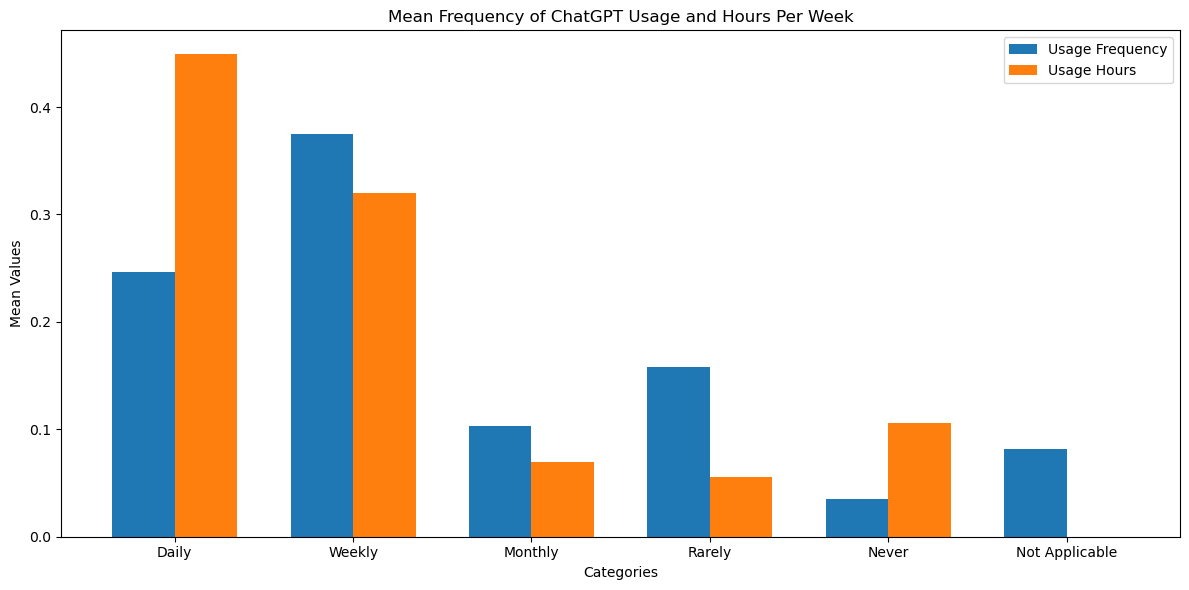

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the combined labels and means
combined_labels = ['Daily', 'Weekly', 'Monthly', 'Rarely', 'Never', 'Not Applicable']
usage_means = [0.246, 0.375, 0.103, 0.158, 0.035, 0.082]
hours_means = [0.449, 0.320, 0.070, 0.056, 0.106, 0.0]  # Adding 0.0 to match the length

x = np.arange(len(combined_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, usage_means, width, label='Usage Frequency')
rects2 = ax.bar(x + width/2, hours_means, width, label='Usage Hours')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Frequency of ChatGPT Usage and Hours Per Week')
ax.set_xticks(x)
ax.set_xticklabels(combined_labels)
ax.legend()

fig.tight_layout()

plt.show()

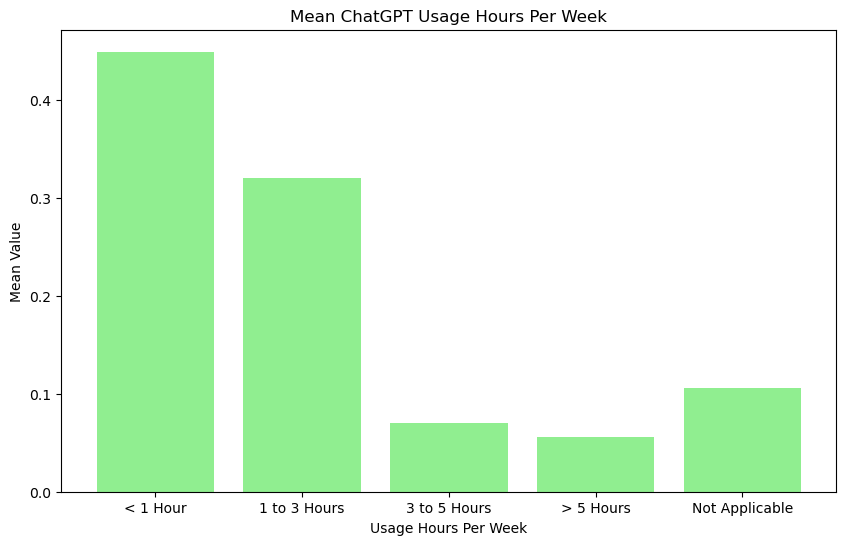

In [23]:
# Mean values for hours per week
hours_means = [0.449, 0.320, 0.070, 0.056, 0.106]
hours_labels = ['< 1 Hour', '1 to 3 Hours', '3 to 5 Hours', '> 5 Hours', 'Not Applicable']

plt.figure(figsize=(10, 6))
plt.bar(hours_labels, hours_means, color='lightgreen')
plt.xlabel('Usage Hours Per Week')
plt.ylabel('Mean Value')
plt.title('Mean ChatGPT Usage Hours Per Week')
plt.show()


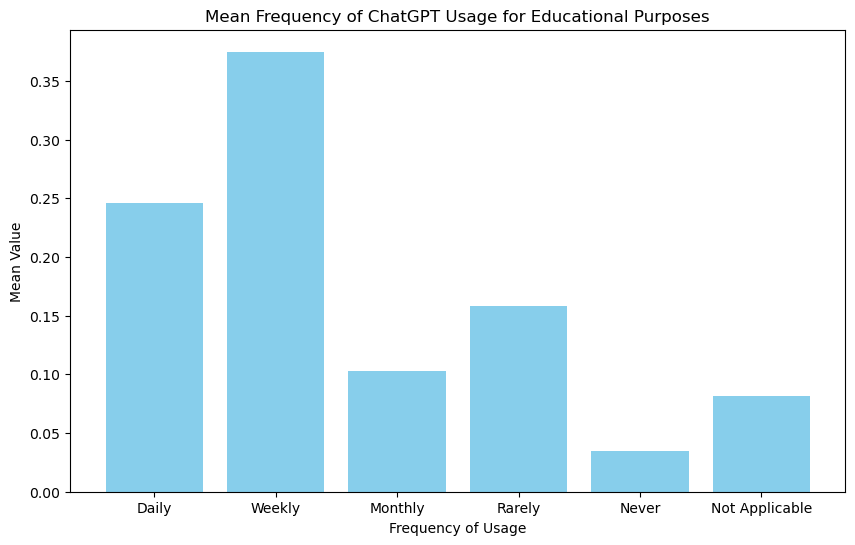

In [24]:
# Mean values for frequency of usage
usage_means = [0.246, 0.375, 0.103, 0.158, 0.035, 0.082]
usage_labels = ['Daily', 'Weekly', 'Monthly', 'Rarely', 'Never', 'Not Applicable']

plt.figure(figsize=(10, 6))
plt.bar(usage_labels, usage_means, color='skyblue')
plt.xlabel('Frequency of Usage')
plt.ylabel('Mean Value')
plt.title('Mean Frequency of ChatGPT Usage for Educational Purposes')
plt.show()


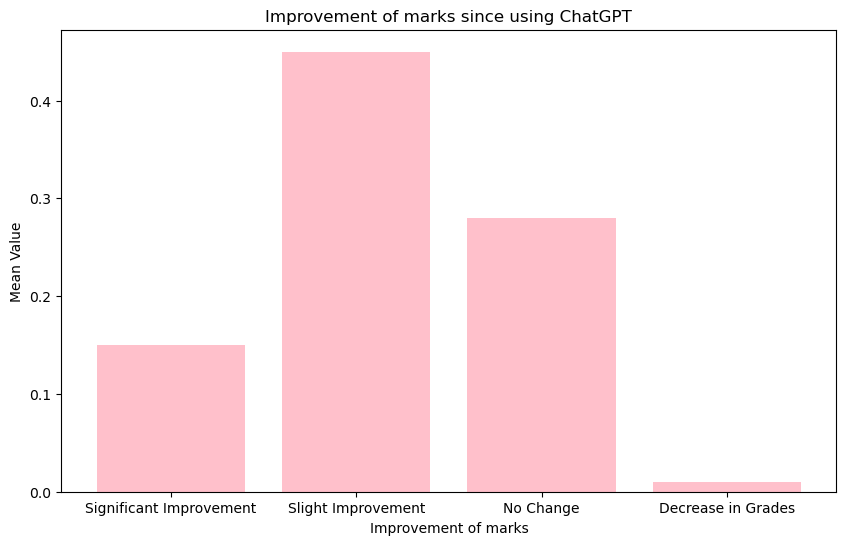

In [26]:
marks_means = [0.15, 0.45, 0.28, 0.01]
marks_labels = ['Significant Improvement', 'Slight Improvement', 'No Change', 'Decrease in Grades']

plt.figure(figsize=(10, 6))
plt.bar(marks_labels, marks_means, color='pink')
plt.xlabel('Improvement of marks')
plt.ylabel('Mean Value')
plt.title('Improvement of marks since using ChatGPT')
plt.show()


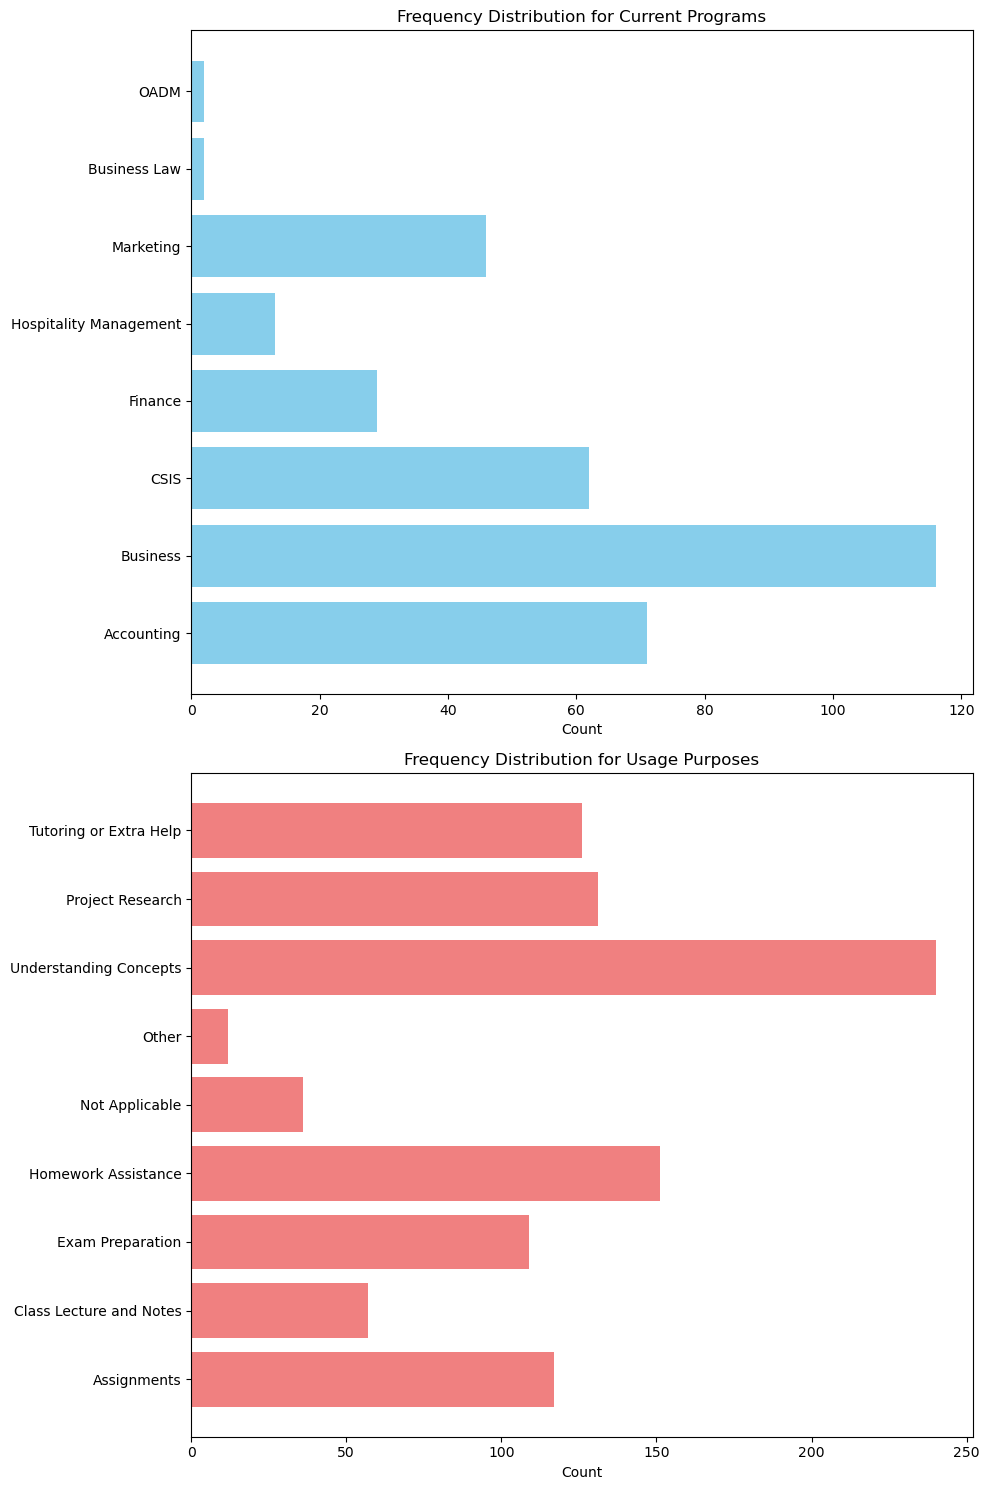

In [27]:
import matplotlib.pyplot as plt

# Data for Current Programs
current_programs = {
    'Accounting': [270, 71],
    'Business': [225, 116],
    'CSIS': [279, 62],
    'Finance': [312, 29],
    'Hospitality Management': [328, 13],
    'Marketing': [295, 46],
    'Business Law': [339, 2],
    'OADM': [339, 2]
}

# Data for Usage Purposes
usage_purposes = {
    'Assignments': [224, 117],
    'Class Lecture and Notes': [284, 57],
    'Exam Preparation': [232, 109],
    'Homework Assistance': [190, 151],
    'Not Applicable': [305, 36],
    'Other': [329, 12],
    'Understanding Concepts': [101, 240],
    'Project Research': [210, 131],
    'Tutoring or Extra Help': [215, 126]
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

# Plot for Current Programs
program_labels = list(current_programs.keys())
program_counts = [count[1] for count in current_programs.values()]

ax1.barh(program_labels, program_counts, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_title('Frequency Distribution for Current Programs')

# Plot for Usage Purposes
purpose_labels = list(usage_purposes.keys())
purpose_counts = [count[1] for count in usage_purposes.values()]

ax2.barh(purpose_labels, purpose_counts, color='lightcoral')
ax2.set_xlabel('Count')
ax2.set_title('Frequency Distribution for Usage Purposes')

# Adjust layout
plt.tight_layout()
plt.show()


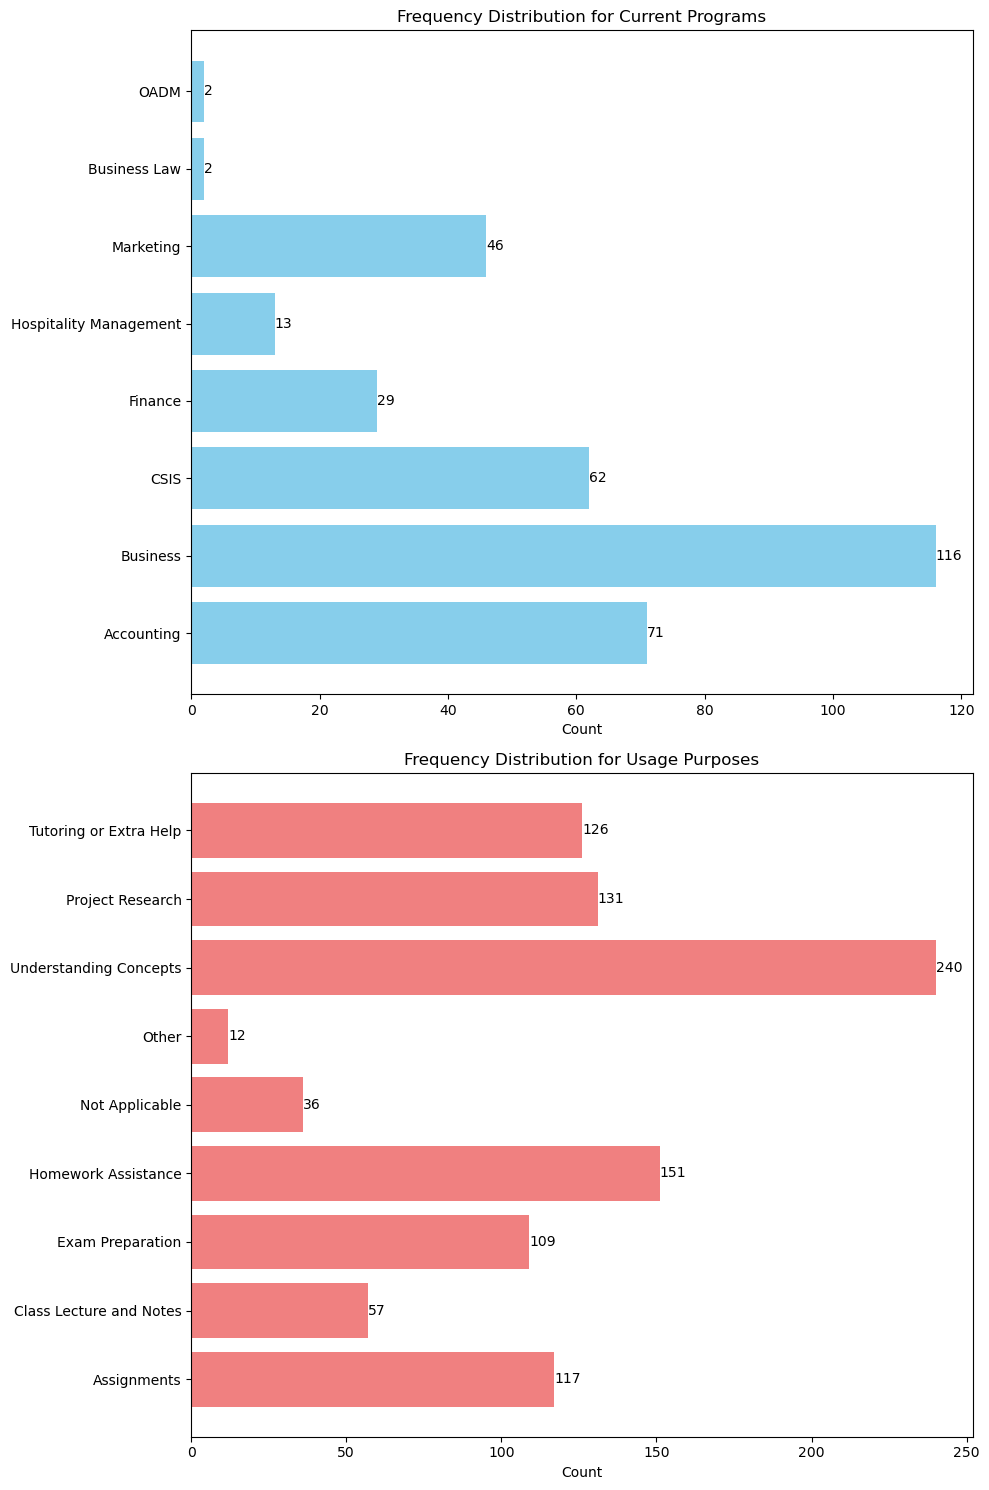

In [28]:
import matplotlib.pyplot as plt

# Data for Current Programs
current_programs = {
    'Accounting': [270, 71],
    'Business': [225, 116],
    'CSIS': [279, 62],
    'Finance': [312, 29],
    'Hospitality Management': [328, 13],
    'Marketing': [295, 46],
    'Business Law': [339, 2],
    'OADM': [339, 2]
}

# Data for Usage Purposes
usage_purposes = {
    'Assignments': [224, 117],
    'Class Lecture and Notes': [284, 57],
    'Exam Preparation': [232, 109],
    'Homework Assistance': [190, 151],
    'Not Applicable': [305, 36],
    'Other': [329, 12],
    'Understanding Concepts': [101, 240],
    'Project Research': [210, 131],
    'Tutoring or Extra Help': [215, 126]
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

# Plot for Current Programs
program_labels = list(current_programs.keys())
program_counts = [count[1] for count in current_programs.values()]

bars1 = ax1.barh(program_labels, program_counts, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_title('Frequency Distribution for Current Programs')

# Add labels to the bars
for bar in bars1:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Plot for Usage Purposes
purpose_labels = list(usage_purposes.keys())
purpose_counts = [count[1] for count in usage_purposes.values()]

bars2 = ax2.barh(purpose_labels, purpose_counts, color='lightcoral')
ax2.set_xlabel('Count')
ax2.set_title('Frequency Distribution for Usage Purposes')

# Add labels to the bars
for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust layout
plt.tight_layout()
plt.show()
